<a href="https://colab.research.google.com/github/bartiralira/DeepLearning/blob/main/6_CNN_Dataset_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


***Participantes (RM - NOME):***<br>
Vitor Luiz Carvalhal - 337129<br>
Ricardo Fabbro Antonelli - 339505<br>
Bartira Lira Lafiandre - 340177<br>
Tiago Batista Pessoa - 339575<br>


> Usando o dataset CIFAR10, aumente a taxa de acerto atual(que em cerca de 60%) em ao menos 18% (totalizando 78% - 80% de acerto aproximadamente) calibrando a CNN.<br>
Dicas:<br>
Tente alterar a quantidade de épocas;<br>
Tente alterar o otimizador(gradiente);<br>
Tente alterar o tamanho do batch_size;<br>
Tente alterar o tamanho dos filtros convolucionais;<br>
Tente alterar a função de ativação na camada completamente conectada;<br>
Apliquei os pré-processamentos necessários;<br>
Apresente a evolução dos conjuntos de treino e validação;<br>
Apresente a acurácia do cojunto de testes;<br>
Apresente a configuração ( estrutura) da rede neural.<br>


### 1. Carregando Bibliotecas

In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
import tensorflow as tf

Inicializa o Google Drive. É necessário entrar com as credenciais do Gmail

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Carregando o dataset pré-embaralhado de treinamento bem como os dados de teste

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


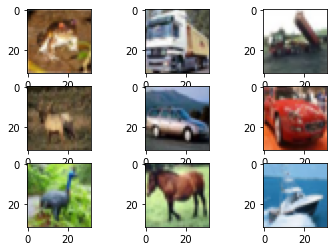

In [4]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

"One-hot encoding" aplicado aos rótulos


In [6]:
y_test_original = y_test # guardarei essa variavel para usar no report de classificação
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
num_classes

10

divindo dataset de treinamento em treinamento, teste e validação - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória

In [9]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

Impressão da forma do conjunto de treino

In [10]:
print('x_train shape:', x_train.shape)

x_train shape: (45000, 32, 32, 3)


In [11]:
print('x_valid shape:', x_valid.shape)

x_valid shape: (5000, 32, 32, 3)


Impressão do número de imagens nos datasets de treinamento, teste e validação

In [12]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

45000 train samples
10000 test samples
5000 validation samples


### 5. Definindo a arquitetura do modelo (IMPORTANTE!)

*   2 camadas convolucionais de tamanho progressivamente crescente
*   Máximo de camadas de "pooling" (2x2) seguidas por tais 3 camadas convolucionais
*   Uma camada do tipo totalmente conectada de 120 neurônios
*   Uma camada do tipo totalmente conectada de 84 neurônios
*   Ultimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
*   "Dropout" de 0,2-0,3







In [13]:
model = Sequential()
model.add(Conv2D(16, (3, 3),  activation='relu', input_shape=(32, 32, 3),padding="same"))
model.add(Conv2D(32, (3, 3),  activation='relu',padding="same"))                         
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

In [14]:
model.add(Conv2D(32, (3, 3),  activation='relu',padding="valid"))
model.add(Conv2D(64,(3, 3),  activation='relu',padding="valid"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(256, activation='relu'))
#model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))

Tentem executar a rede configurando outras funções de ativação (como visto em nossa Aula 3)
mais informações em https://keras.io/activations/

> **Tentativa 1:** Realizadas as alterações:<br>
* Adicionado o padding = "same"
* Adicionado mais um tensor na camada completamente conectada com ativação relu
* Alterado o batch_size para 100. Reduzimo.
* Reduzimos o dropout para apenas 1 de 20%

> **Tentativa 2:** Realizadas as alterações:<br>
* Adicionado o padding = "valid"
* Retirada um tensor na camada conectada. Deixando com 2 apenas
* Alterado o batch_size para 100. Reduzimo.
* Aumentamos o dropout para apenas 4, uma em cada camada,


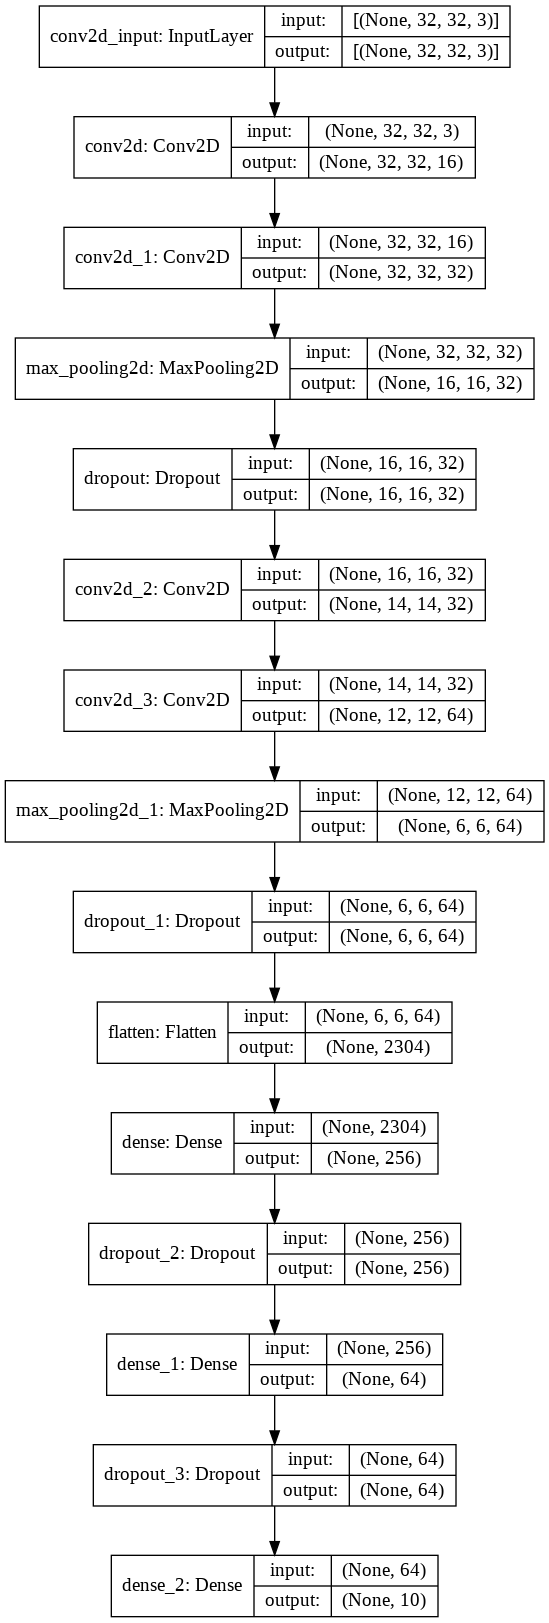

In [17]:
plot_model(model, to_file='cnn-CIFAR10.png', show_shapes=True, show_layer_names=True)

### 6. Compilando o modelo

Compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
* mais informações em https://keras.io/losses/
* mais informações em https://keras.io/optimizers/
* mais informações em https://keras.io/metrics/

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])                  

### 7. Treinando o modelo

In [19]:
from keras.callbacks import ModelCheckpoint

#O keras passa a salvar o melhor modelo pela acurácia de validação

In [20]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/checkpoints/modelocifar_FIAP_Shift.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy') #
                              
hist = model.fit(x_train, y_train, batch_size=100, epochs=50, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/50
450/450 [==============================] - 17s 7ms/step - loss: 1.9464 - accuracy: 0.2661 - val_loss: 1.4541 - val_accuracy: 0.4752

Epoch 00001: val_accuracy improved from -inf to 0.47520, saving model to /content/drive/My Drive/checkpoints/modelocifar_FIAP_Shift.hdf5
Epoch 2/50
450/450 [==============================] - 2s 5ms/step - loss: 1.4181 - accuracy: 0.4829 - val_loss: 1.1689 - val_accuracy: 0.5786

Epoch 00002: val_accuracy improved from 0.47520 to 0.57860, saving model to /content/drive/My Drive/checkpoints/modelocifar_FIAP_Shift.hdf5
Epoch 3/50
450/450 [==============================] - 2s 5ms/step - loss: 1.1933 - accuracy: 0.5717 - val_loss: 0.9922 - val_accuracy: 0.6472

Epoch 00003: val_accuracy improved from 0.57860 to 0.64720, saving model to /content/drive/My Drive/checkpoints/modelocifar_FIAP_Shift.hdf5
Epoch 4/50
450/450 [==============================] - 2s 5ms/step - loss: 1.0639 - accuracy: 0.6226 - val_loss: 0.8961 - val_accuracy: 0.6854

Epoch 0000

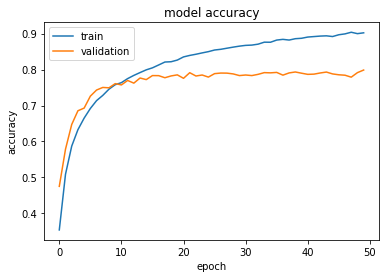

In [21]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

In [22]:
model = load_model("/content/drive/My Drive/checkpoints/modelocifar_FIAP_Shift.hdf5")

### 8. Cálculo da precisão de classificação no dataset de testes

Avaliar e imprimir a precisão do teste

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print("%s%.2f  "% ("Loss     : ", score[0]))
print("%s%.2f%s"% ("Accuracy : ", score[1]*100, "%"))


Loss     : 0.78  
Accuracy : 78.46%


### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [24]:
y_hat = model.predict(x_test)

In [25]:
y_hat[100,:]

array([0.0327137 , 0.00109273, 0.8259687 , 0.9139305 , 0.9837113 ,
       0.970499  , 0.03687171, 0.99473566, 0.00205125, 0.00470934],
      dtype=float32)

In [26]:
y_hat_classes = model.predict_classes(x_test)
y_hat_classes

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 8, 8, ..., 5, 1, 7])

In [27]:
y_hat_classes[100]

7

Definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

In [28]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [29]:
y_pred = y_hat.argmax(axis=-1)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_original, y_pred))
print('Accuracy Score:\n', accuracy_score(y_test_original, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80      1000
           1       0.86      0.90      0.88      1000
           2       0.73      0.64      0.68      1000
           3       0.60      0.60      0.60      1000
           4       0.75      0.76      0.76      1000
           5       0.71      0.68      0.69      1000
           6       0.85      0.84      0.84      1000
           7       0.82      0.83      0.82      1000
           8       0.86      0.87      0.87      1000
           9       0.83      0.84      0.83      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

Accuracy Score:
 0.7781


Plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

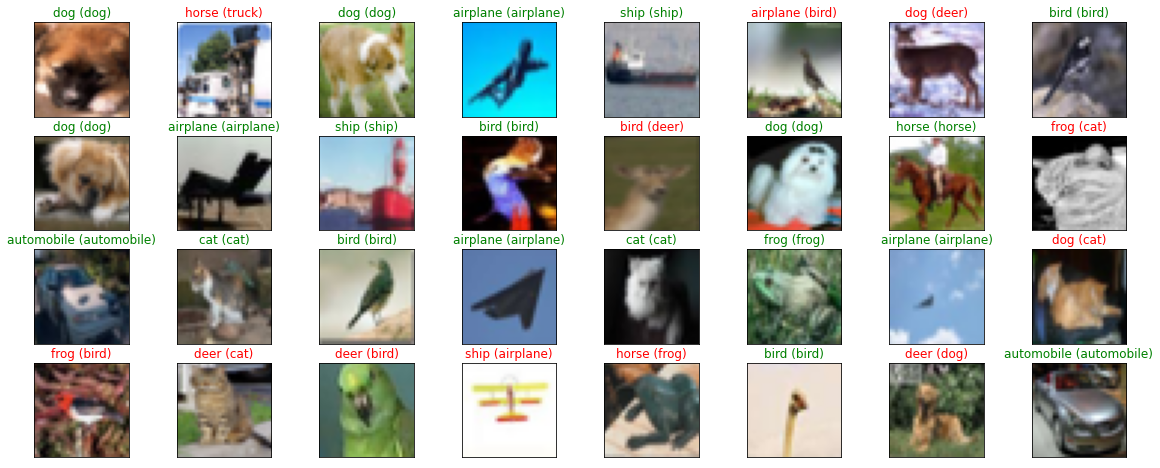

In [31]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
